In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

from tqdm import tqdm

import sys
sys.path.append("..")

from src.utils.dataset import parallelogram_dataset, repeat_dataset, ToyDataset
from src.utils.model import ToyTransformer
from src.utils.visualization import visualize_embedding

seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

torch.set_default_tensor_type(torch.DoubleTensor)

p = 5
embd_dim = 5
input_token = 3
lattice_dim = 2
vocab_size = p ** lattice_dim

# data
dataset = parallelogram_dataset(p=p, dim=lattice_dim, num=1000, seed=seed)
dataset = repeat_dataset(dataset)

# Parameters
d_model = 16     # Embedding and hidden size
nhead = 2        # Number of attention heads
num_layers = 2   # Number of transformer layers
seq_len = 3      # Sequence length
num_epochs = 500
batch_size = 16
learning_rate = 0.001

    
toy_dataset = ToyDataset(dataset['train_data_id'], dataset['train_label'])
dataloader = torch.utils.data.DataLoader(toy_dataset, batch_size=batch_size, shuffle=True)

param_dict = {
    'num_epochs': num_epochs,
    'learning_rate': learning_rate,
    'dataloader': dataloader
}


/om/user/dbaek/.conda/envs/sae-exp/lib/python3.10/site-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)


 10%|█         | 50/500 [00:23<03:07,  2.40it/s]

Epoch 50/500, Loss: 1.2325


 20%|██        | 100/500 [00:44<02:47,  2.38it/s]

Epoch 100/500, Loss: 0.6442


 30%|███       | 150/500 [01:05<02:27,  2.37it/s]

Epoch 150/500, Loss: 0.4620


 40%|████      | 200/500 [01:26<02:07,  2.36it/s]

Epoch 200/500, Loss: 0.3900


 50%|█████     | 250/500 [01:47<01:45,  2.37it/s]

Epoch 250/500, Loss: 0.3663


 60%|██████    | 300/500 [02:08<01:23,  2.39it/s]

Epoch 300/500, Loss: 0.3313


 70%|███████   | 350/500 [02:29<01:02,  2.41it/s]

Epoch 350/500, Loss: 0.2818


 80%|████████  | 400/500 [02:50<00:42,  2.38it/s]

Epoch 400/500, Loss: 0.2350


 90%|█████████ | 450/500 [03:11<00:20,  2.38it/s]

Epoch 450/500, Loss: 0.2454


100%|██████████| 500/500 [03:32<00:00,  2.35it/s]

Epoch 500/500, Loss: 0.1799
Explained Variance Ratio [0.21944126 0.20326077]


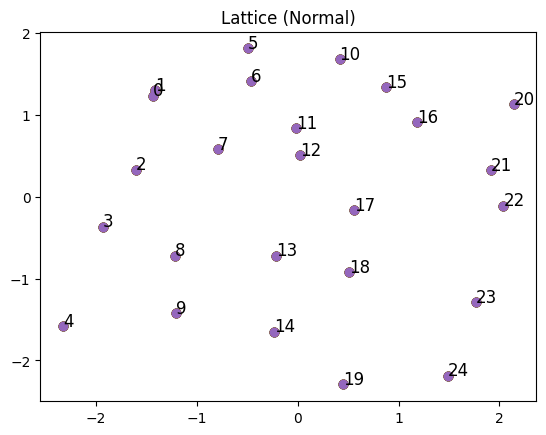

In [3]:
model = ToyTransformer(vocab_size, d_model, nhead, num_layers, seq_len, use_dist_layer=False)
model.train(param_dict)
visualize_embedding(model.embedding.weight, "Lattice (Normal)")

 10%|█         | 50/500 [00:22<03:22,  2.22it/s]

Epoch 50/500, Loss: 1.8054


 20%|██        | 100/500 [00:45<02:59,  2.23it/s]

Epoch 100/500, Loss: 0.9817


 30%|███       | 150/500 [01:07<02:38,  2.21it/s]

Epoch 150/500, Loss: 0.7001


 40%|████      | 200/500 [01:30<02:15,  2.21it/s]

Epoch 200/500, Loss: 0.5673


 50%|█████     | 250/500 [01:53<01:51,  2.23it/s]

Epoch 250/500, Loss: 0.5182


 60%|██████    | 300/500 [02:15<01:31,  2.20it/s]

Epoch 300/500, Loss: 0.4825


 70%|███████   | 350/500 [02:38<01:07,  2.22it/s]

Epoch 350/500, Loss: 0.4375


 80%|████████  | 400/500 [03:00<00:44,  2.24it/s]

Epoch 400/500, Loss: 0.3892


 90%|█████████ | 450/500 [03:23<00:22,  2.19it/s]

Epoch 450/500, Loss: 0.4006


100%|██████████| 500/500 [03:45<00:00,  2.21it/s]

Epoch 500/500, Loss: 0.3997
Explained Variance Ratio [0.55501984 0.44299811]


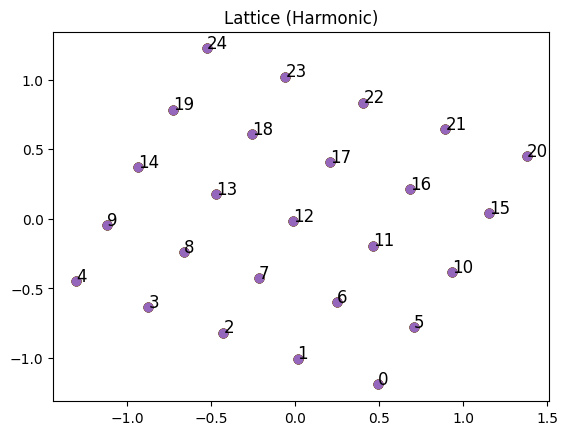

In [4]:
model = ToyTransformer(vocab_size, d_model, nhead, num_layers, seq_len, use_dist_layer=True)
model.train(param_dict)
visualize_embedding(model.embedding.weight, "Lattice (Harmonic)")

 10%|█         | 50/500 [00:22<03:19,  2.26it/s]

Epoch 50/500, Loss: 1.6676


 20%|██        | 100/500 [00:45<03:01,  2.20it/s]

Epoch 100/500, Loss: 0.9208


 30%|███       | 150/500 [01:08<02:36,  2.23it/s]

Epoch 150/500, Loss: 0.6504


 40%|████      | 200/500 [01:30<02:14,  2.23it/s]

Epoch 200/500, Loss: 0.4574


 50%|█████     | 250/500 [01:53<01:52,  2.23it/s]

Epoch 250/500, Loss: 0.4005


 60%|██████    | 300/500 [02:16<01:30,  2.20it/s]

Epoch 300/500, Loss: 0.2875


 70%|███████   | 350/500 [02:38<01:07,  2.21it/s]

Epoch 350/500, Loss: 0.2455


 80%|████████  | 400/500 [03:01<00:44,  2.24it/s]

Epoch 400/500, Loss: 0.2026


 90%|█████████ | 450/500 [03:23<00:22,  2.22it/s]

Epoch 450/500, Loss: 0.1625


100%|██████████| 500/500 [03:46<00:00,  2.21it/s]

Epoch 500/500, Loss: 0.1482
Explained Variance Ratio [0.65679508 0.29522514]


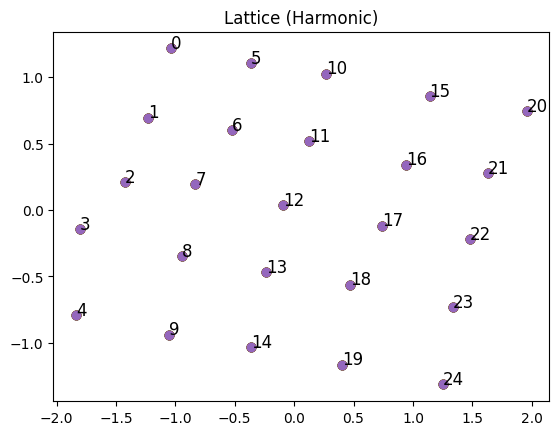

In [2]:
model = ToyTransformer(vocab_size, d_model, nhead, num_layers, seq_len, use_dist_layer=True)
model.train(param_dict)
visualize_embedding(model.embedding.weight, "Lattice (Harmonic)")